In [68]:
import polars as pl
import seaborn as sns
import matplotlib as plt
import pandas as pd
from icecream import ic
D = pl.read_csv('../data/scene_data')

In [4]:
D

,Person,SeasonNr,EpisodeID,EpisodeTitle,Scene,ScreenLine
i64,str,i64,i64,str,str,str
0,"""waymar royce""",1,1,"""winter is comi…","""Unnamed Scene""",""" What d’you ex…"
1,"""will""",1,1,"""winter is comi…","""Unnamed Scene""",""" I’ve never se…"
2,"""waymar royce""",1,1,"""winter is comi…","""Unnamed Scene""",""" How close did…"
3,"""will""",1,1,"""winter is comi…","""Unnamed Scene""",""" Close as any …"
4,"""gared""",1,1,"""winter is comi…","""Unnamed Scene""",""" We should hea…"
5,"""yohn royce""",1,1,"""winter is comi…","""Unnamed Scene""",""" Do the dead f…"
6,"""gared""",1,1,"""winter is comi…","""Unnamed Scene""",""" Our orders we…"
7,"""yohn royce""",1,1,"""winter is comi…","""Unnamed Scene""",""" You don’t thi…"
8,"""will""",1,1,"""winter is comi…","""Unnamed Scene""",""" Whatever did …"


/home/lsd/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lsd/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

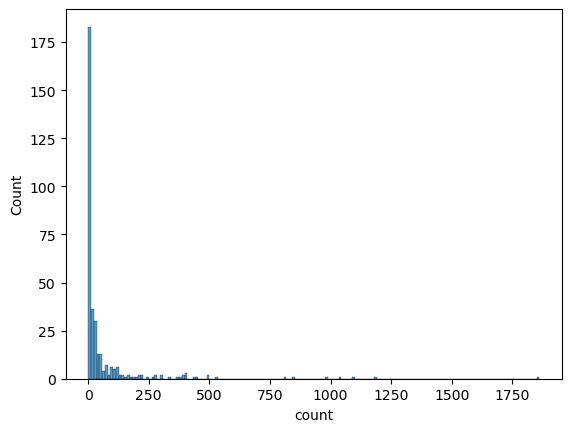

In [33]:
scenes_count = (D
    .group_by(pl.col('Person'))
    .agg(pl.col('EpisodeTitle').count().alias('count'))
)
sns.histplot(x=scenes_count['count'])

/home/lsd/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lsd/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

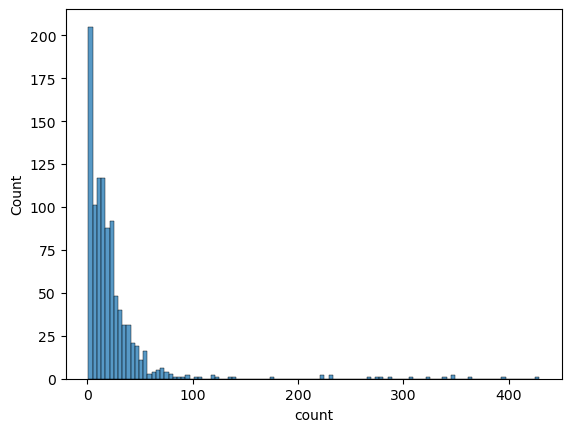

In [36]:

sns.histplot(x=scenes_count['count'])

ic| Nscenes: 991
/home/lsd/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lsd/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lsd/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

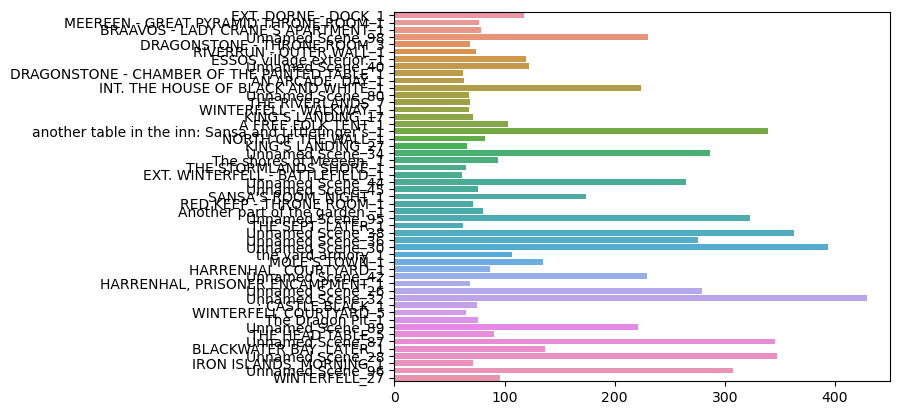

In [86]:
# Amount of unique scenes 
Nscenes = D['Scene'].unique().len() 
ic(Nscenes)

# Number of spoken lines for each scene seen
scenes_count = (D
    .group_by(pl.col('Scene'))
    .agg(pl.col('EpisodeTitle').count().alias('count'))
)

tmp = scenes_count.filter(pl.col('count') > 60)
sns.barplot(y=tmp['Scene'].to_numpy(), x=tmp['count'].to_numpy())

In [90]:
metadata = pd.read_csv('../data/characher_metadata2.csv')
metadata_name = list(metadata.iloc[:,0])
metadata_name = set([name.lower() for name in metadata_name])
"stone" in metadata_name

False

In [148]:
D

,Person,SeasonNr,EpisodeID,EpisodeTitle,Scene,ScreenLine
i64,str,i64,i64,str,str,str
0,"""waymar royce""",1,1,"""winter is comi…","""Unnamed Scene""",""" What d’you ex…"
1,"""will""",1,1,"""winter is comi…","""Unnamed Scene""",""" I’ve never se…"
2,"""waymar royce""",1,1,"""winter is comi…","""Unnamed Scene""",""" How close did…"
3,"""will""",1,1,"""winter is comi…","""Unnamed Scene""",""" Close as any …"
4,"""gared""",1,1,"""winter is comi…","""Unnamed Scene""",""" We should hea…"
5,"""yohn royce""",1,1,"""winter is comi…","""Unnamed Scene""",""" Do the dead f…"
6,"""gared""",1,1,"""winter is comi…","""Unnamed Scene""",""" Our orders we…"
7,"""yohn royce""",1,1,"""winter is comi…","""Unnamed Scene""",""" You don’t thi…"
8,"""will""",1,1,"""winter is comi…","""Unnamed Scene""",""" Whatever did …"


In [158]:
D.with_columns(pl.when(pl.col('Person') == "waymar royce")
               .then(pl.lit('A'))
               .alias('test')
                )

,Person,SeasonNr,EpisodeID,EpisodeTitle,Scene,ScreenLine,test
i64,str,i64,i64,str,str,str,str
0,"""waymar royce""",1,1,"""winter is comi…","""Unnamed Scene""",""" What d’you ex…","""A"""
1,"""will""",1,1,"""winter is comi…","""Unnamed Scene""",""" I’ve never se…",null
2,"""waymar royce""",1,1,"""winter is comi…","""Unnamed Scene""",""" How close did…","""A"""
3,"""will""",1,1,"""winter is comi…","""Unnamed Scene""",""" Close as any …",null
4,"""gared""",1,1,"""winter is comi…","""Unnamed Scene""",""" We should hea…",null
5,"""yohn royce""",1,1,"""winter is comi…","""Unnamed Scene""",""" Do the dead f…",null
6,"""gared""",1,1,"""winter is comi…","""Unnamed Scene""",""" Our orders we…",null
7,"""yohn royce""",1,1,"""winter is comi…","""Unnamed Scene""",""" You don’t thi…",null
8,"""will""",1,1,"""winter is comi…","""Unnamed Scene""",""" Whatever did …",null


In [263]:
locations = ["King's Landing", 'Winterfell', 'The North','The Wall','blackwater bay','vision of the past','the frozen lake','the baratheon fleet', 'Dragonstone', 'Braavos', 'Meereen', 'Astapor', 'Yunkai', 'the godswood','stark war camp','Qarth', 'The Vale of Arryn', 'The Riverlands', 'Riverlands','The Reach', 'Dorne', 'Casterly Rock', 'Harrenhal', 'Pyke', 'Highgarden', "Storm's End", 'Riverrun', 'Castle Black', 'White Harbor', 'Oldtown', 'Pentos', 'Volantis', 'Lys', 'Norvos', 'Lorath', 'the vale','The Eyrie', 'Sunspear', 'The Twins', 'Moat Cailin', 'Sisterton', 'Lannisport', 'Dragonstone', 'Dreadfort', "Mole's Town", 'Saltpans', 'The Arbor', 'Seagard', 'Greywater Watch', 'Deepwood Motte', 'Karhold', 'Duskendale', 'Horn Hill', 'Fairmarket', 'Crackclaw Point', "King'swood", 'The Neck', 'Blackhaven', 'Stokeworth', 'Rat Cook Inn', 'Stoney Sept', 'Gulltown', 'Qohor', 'Ny Sar', 'Ib', 'Braavos', 'Lorath', 'Saath', 'Vaes Dothrak', 'Lhazar', 'Leng', 'Asshai', 'Yi Ti', 'Bitterbridge', 'Bronzegate', 'Dyre Den', 'Felwood', 'Golden Tooth', 'Ghoyan Drohe', 'Great Fork', 'Hayford', 'Hedge Knight Inn', 'Inn at the Crossroads', "Ironman\'s Bay", 'Irongate', 'Kayce', 'Last River', 'The Fingers', 'Sallydance', 'Stoney Sept', 'Whispers', 'Wickendon', 'Wolfswood', 'Wyl', 'Yronwood', 'White Tree', 'Three Sisters', "Storrold's Point", 'Starfall', 'Sharp Point', 'Sarsfield', 'Ryamsport', 'Red Fork', 'Ramsgate', 'Oxcross']  # Add more locations as needed
locations = locations +  ['the broken farmhouse', "littlefinger's champers", 'stark encampment', "tyrion's chambers", 'stark/lannister battle', 'targaryen fleet', 'the wedding reception', 'the stark and targaryen army', 'great weirwood tree', 'the crypt', "bran's chambers", 'red keep', "joffrey's chambers", "stannis's stormlands army camp", 'house of the undying', 'baratheon war camp', "sansa's chambers", "cersei's chambers"]

locationsset = set([x.lower() for x in locations])
from fuzzywuzzy import fuzz
from tqdm import tqdm
fuzz.partial_ratio('dragonstone - chamber of the abc','dragon stone')
unique_scenes = D['Scene'].unique()
for scene in (unique_scenes):
    final_rename = None
    og_scene = scene
    scene = scene.lower()
    # Remove unique identifier
    scene = scene.split('_')[0:-1]
    scene =''.join(scene)
    # Remove specific location ie. winterfell – courtyard  or essos, outside yunkai
    if '–' in scene:
        scene = scene.split('–')[0]
        scene =''.join(scene)
    if '-' in scene:
        scene = scene.split('-')[0]
        scene =''.join(scene)
    if ',' in scene:
        scene = scene.split(',')[0]
        scene =''.join(scene)

    # calculate fuz ratio for each location, scene pair. 
    # pick the highest ratio if above threshold
    max_fuzzy_ratio = [0, None, None]
    for name in metadata_name:
        fuzzy_ratio = fuzz.token_sort_ratio(scene, name)
        if fuzzy_ratio > max_fuzzy_ratio[0]:
            max_fuzzy_ratio[0] = fuzzy_ratio
            max_fuzzy_ratio[1] = og_scene
            max_fuzzy_ratio[2] = name
    threshold = 80
    if max_fuzzy_ratio[0] > threshold:
        final_rename = max_fuzzy_ratio
        #print('MATCH LONG:',final_rename)

    # Now also check pure locations as seen in location vector and take the best of them if they have a good match
    max_fuzzy_ratio = [0, None, None]
    for name in locations:
        fuzzy_ratio = fuzz.token_sort_ratio(scene, name)
        if fuzzy_ratio > max_fuzzy_ratio[0]:
            max_fuzzy_ratio[0] = fuzzy_ratio
            max_fuzzy_ratio[1] = og_scene
            max_fuzzy_ratio[2] = name
    threshold = 80
    if max_fuzzy_ratio[0] > threshold:
        final_rename = max_fuzzy_ratio
        #print('MATCH SHORT:',final_rename)
    
    # Lastly check if any has the eact location in if none found yet
    if final_rename is None:
        add = False
        to_add = None
        for location in locationsset:
            found = scene.find(location)
            if found != -1:
                add = True
                to_add = location

        if add:
            max_fuzzy_ratio[0] = fuzzy_ratio
            max_fuzzy_ratio[1] = og_scene
            max_fuzzy_ratio[2] = to_add   
            final_rename = max_fuzzy_ratio
            #print('PARTIAL MATCH:' , scene, final_rename)

    if final_rename is None:
        print('NOT MATCH:', og_scene, '| Scene formatted:', scene)
        pass
    # If found a clear location name, then add it to the dataframe.
    if final_rename is not None:
        D = D.with_columns(pl.when(pl.col('Scene') == final_rename[1])
                        .then(pl.lit(final_rename[2].lower()))
                        .otherwise(pl.col('scene_locations'))
                        .alias('scene_locations')
                        )
        #print('MATCH:', final_rename)

NOT MATCH: Unnamed Scene_74 | Scene formatted: unnamed scene
NOT MATCH: Unnamed Scene_44 | Scene formatted: unnamed scene
NOT MATCH: Unnamed Scene_14 | Scene formatted: unnamed scene
NOT MATCH: ABOVE THE BATTLE_9 | Scene formatted: above the battle
NOT MATCH: CERSEI’S FACE - KING’S LANDING - MODERN DAY_1 | Scene formatted: cersei’s face 
NOT MATCH: Council Chamber._1 | Scene formatted: council chamber.
NOT MATCH: XARO'S SAFE_1 | Scene formatted: xaro's safe
NOT MATCH: FARMHOUSE INTERIOR_1 | Scene formatted: farmhouse interior
NOT MATCH: Unnamed Scene_110 | Scene formatted: unnamed scene
NOT MATCH: REDKEEP - COUNCIL ROOM_1 | Scene formatted: redkeep 
NOT MATCH: Unnamed Scene_88 | Scene formatted: unnamed scene
NOT MATCH: Unnamed Scene_45 | Scene formatted: unnamed scene
NOT MATCH: XARO'S DINING ROOM_1 | Scene formatted: xaro's dining room
NOT MATCH: CERSEI'S ROOM_1 | Scene formatted: cersei's room
NOT MATCH: COURTYARD BEHIND THE HARBOR WALL_1 | Scene formatted: courtyard behind the harb

In [264]:
D.to_pandas().to_csv('../data/scene_data_with_location.csv')

In [211]:
D = pd.read_csv('../data/scene_data_with_location.csv')
D = pl.from_pandas(D)
D.filter(
    pl.col('scene_locations').is_null()
    ) .select('Scene').unique().to_numpy()

array([['OUTSIDE THE GATE_1'],
       ['THE RAMPARTS_17'],
       ['Unnamed Scene_21'],
       ['STARK ENCAMPMENT_1'],
       ['THE BARATHEON FLEET_13'],
       ['outside an Inn. Sounds of men can be heard in the buildings._1'],
       ['Unnamed Scene_128'],
       ["TYRION'S MAKESHIFT CELL_1"],
       ['THE FIELD_13'],
       ['Unnamed Scene_3'],
       ['INSIDE THE TOWER OF THE RED KEEP_7'],
       ['Winterfell interior_1'],
       ['MEEREEN GREAT PYRAMID - COUNCIL CHAMBER_1'],
       ["EURON'S SHIP - CABIN_1"],
       ["THEON'S SHIPS_1"],
       ['DARK HALLWAY_1'],
       ['Unnamed Scene_123'],
       ['THE STARK/LANNISTER BATTLE_1'],
       ['WINTERFELL COURTYARD_7'],
       ["LORAS's chambers_1"],
       ["THE HAND'S CHAMBERS_1"],
       ['THE PATH LEADING TO ASTAPOR_1'],
       ['A FIELD IN THE NORTH_1'],
       ["INSIDE THE PRISONER'S TENT_1"],
       ['AT THE GATE_1'],
       ["THE STREETS OF KING'S LANDING_1"],
       ['INSIDE THE HARBOR WALL_1'],
       ['GREAT WEIRWOOD TREE 